In [1]:
import numpy as np
import netCDF4
import glob
import esig
import iisignature
import time
import matplotlib.pyplot as plt


## Transformation "lead-lag"

In [2]:
def lead_lag(x):
    #Lead-lag transformation, deals with NumPy arrays.
    d = x.shape[0]
    x = x[...,np.newaxis]
    x = np.stack([x]*(2*d), axis = 2).reshape(d, -1)
    x = np.concatenate((x,x), axis = 0)
    print(x)
    for i in range(2*d):
        x[2*d - i - 1] = np.roll(x[2*d - i - 1], -i)
    return x[:, :-(2*d - 1)]


In [3]:
#Load the cycles from all the floats 
cycles = []
quality = []
for m in range(10):
    files = glob.glob("ArgoData/290028?/profiles/D*_??" + str(m) + ".nc")
    for file in files :

        data = netCDF4.Dataset(file, 'r')
        pres = data.variables['PRES'][:][0].filled(np.nan)
        psal = data.variables['PSAL'][:][0].filled(np.nan)
        temp = data.variables['TEMP'][:][0].filled(np.nan)
        pres_q = int(data["PRES_ADJUSTED_QC"][0][0]) - 4
        temp_q = int(data["TEMP_ADJUSTED_QC"][0][0]) - 4
        psal_q = int(data["PSAL_ADJUSTED_QC"][0][0]) - 4
        pres = np.ma.filled(pres.astype(float), np.nan)
        psal = np.ma.filled(psal.astype(float), np.nan)
        temp = np.ma.filled(temp.astype(float), np.nan)

        if pres.max() - pres.min() > 1000. and data.dimensions['N_LEVELS'].size >= 3 and data.dimensions['N_PARAM'].size >= 3:
            q = 1
            if pres_q*psal_q*temp_q == 0:
                q = 0
                cycles.append(np.stack([pres/2000.,(psal-35.)/2.,temp/20.]))
            else:
                cycles.append(np.stack([pres/2000.,(psal-35.)/2.,temp/20.]))
            quality.append(q)

In [4]:
cycles_ll = [lead_lag(x) for x in cycles]

[[ 8.64999962e-03  8.64999962e-03  8.64999962e-03  8.64999962e-03
   8.64999962e-03  8.64999962e-03  1.53000002e-02  1.53000002e-02
   1.53000002e-02  1.53000002e-02  1.53000002e-02  1.53000002e-02
   1.25500002e-02  1.25500002e-02  1.25500002e-02  1.25500002e-02
   1.25500002e-02  1.25500002e-02  1.06499996e-02  1.06499996e-02
   1.06499996e-02  1.06499996e-02  1.06499996e-02  1.06499996e-02
   8.89999962e-03  8.89999962e-03  8.89999962e-03  8.89999962e-03
   8.89999962e-03  8.89999962e-03  1.40500002e-02  1.40500002e-02
   1.40500002e-02  1.40500002e-02  1.40500002e-02  1.40500002e-02
   1.77999992e-02  1.77999992e-02  1.77999992e-02  1.77999992e-02
   1.77999992e-02  1.77999992e-02  3.91500015e-02  3.91500015e-02
   3.91500015e-02  3.91500015e-02  3.91500015e-02  3.91500015e-02
   5.95999985e-02  5.95999985e-02  5.95999985e-02  5.95999985e-02
   5.95999985e-02  5.95999985e-02  7.55999985e-02  7.55999985e-02
   7.55999985e-02  7.55999985e-02  7.55999985e-02  7.55999985e-02
   9.63000

[[ 0.0038      0.0038      0.0038     ...  1.00120001  1.00120001
   1.00120001]
 [-0.17749977 -0.17749977 -0.17749977 ... -0.20499992 -0.20499992
  -0.20499992]
 [ 0.75310001  0.75310001  0.75310001 ...  0.09785     0.09785
   0.09785   ]
 [ 0.0038      0.0038      0.0038     ...  1.00120001  1.00120001
   1.00120001]
 [-0.17749977 -0.17749977 -0.17749977 ... -0.20499992 -0.20499992
  -0.20499992]
 [ 0.75310001  0.75310001  0.75310001 ...  0.09785     0.09785
   0.09785   ]]
[[ 0.00365     0.00365     0.00365    ...  1.00170001  1.00170001
   1.00170001]
 [-0.29150009 -0.29150009 -0.29150009 ... -0.1989994  -0.1989994
  -0.1989994 ]
 [ 0.90664997  0.90664997  0.90664997 ...  0.0979      0.0979
   0.0979    ]
 [ 0.00365     0.00365     0.00365    ...  1.00170001  1.00170001
   1.00170001]
 [-0.29150009 -0.29150009 -0.29150009 ... -0.1989994  -0.1989994
  -0.1989994 ]
 [ 0.90664997  0.90664997  0.90664997 ...  0.0979      0.0979
   0.0979    ]]
[[ 0.0037      0.0037      0.0037     ... 

[[ 0.00235     0.00235     0.00235    ...  0.99145001  0.99145001
   0.99145001]
 [-0.18650055 -0.18650055 -0.18650055 ... -0.18950081 -0.18950081
  -0.18950081]
 [ 1.43879995  1.43879995  1.43879995 ...  0.09675     0.09675
   0.09675   ]
 [ 0.00235     0.00235     0.00235    ...  0.99145001  0.99145001
   0.99145001]
 [-0.18650055 -0.18650055 -0.18650055 ... -0.18950081 -0.18950081
  -0.18950081]
 [ 1.43879995  1.43879995  1.43879995 ...  0.09675     0.09675
   0.09675   ]]
[[ 0.00215     0.00215     0.00215    ...  1.00265002  1.00265002
   1.00265002]
 [-0.0114994  -0.0114994  -0.0114994  ... -0.18799973 -0.18799973
  -0.18799973]
 [ 1.48690004  1.48690004  1.48690004 ...  0.09405     0.09405
   0.09405   ]
 [ 0.00215     0.00215     0.00215    ...  1.00265002  1.00265002
   1.00265002]
 [-0.0114994  -0.0114994  -0.0114994  ... -0.18799973 -0.18799973
  -0.18799973]
 [ 1.48690004  1.48690004  1.48690004 ...  0.09405     0.09405
   0.09405   ]]
[[ 0.00215     0.00215     0.00215    

In [58]:
#Signature feature
ord_trunc = 6

#cycles_signature = [iisignature.sig(x.T, ord_trunc) for x in cycles_ll]
cycles_signature_iisig = np.array([iisignature.sig(x.T, ord_trunc) for x in cycles_ll])

#cycles_signature_esig = [esig.tosig.stream2sig(np.array(x.T), ord_trunc) for x in cycles_ll]

#np.save("cycles_signature_esig", cycles_signature_esig)
#np.save("cycles_signature_iisignature", cycles_signature)
#np.save("cycles_signature_iisignature", cycles_signature)

#cycles_signature = np.load("cycles_signature_iisignature.npy", allow_pickle=True)


In [6]:
cycles_signature = np.array(cycles_signature_iisig)
cycles_signature_iisig.shape

(932, 1092)

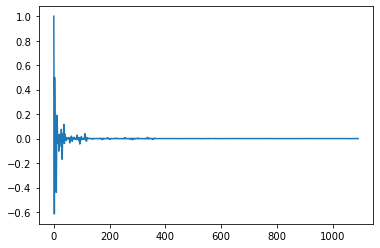

In [7]:
x_0 = np.load("x_3.npy", allow_pickle=True)
plt.plot(cycles_signature_iisig[500])

In [65]:
len_traj = np.array([ [len(x[0])] for x in cycles])
print(np.concatenate((cycles_signature,len_traj), axis=1).shape)

(932, 1093)


## Apprentissage signature

In [66]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

print(np.isnan(np.array(cycles_signature).any()))

False


In [187]:
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(cycles_signature, quality, range(len(cycles_signature)), test_size=0.6, random_state=2)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


print(y_test[35])
print(quality[indices_test[35]])

1
1


In [134]:
alpha = 1.0e-5
reg = Lasso(alpha = alpha, tol=0.01, max_iter=5000, copy_X=True, fit_intercept=True, selection='random')
reg_boost = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsamble = 0.7, colsample_bytree=0.8)
regressors = {"Lasso" : reg, "XGBoost" : reg_boost}

In [135]:
for i in regressors.values():
    i.fit(X_train, y_train)
    

[15:28:25] WARNING: ../src/learner.cc:516: 
Parameters: { subsamble } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [136]:
y_pred_reg_boost = regressors['Lasso'].predict(X_test)
y_pred_reg = regressors['XGBoost'].predict(X_test)

In [137]:
t = 0.5
for i in regressors :
    prob = regressors[i].predict(X_test)
    y_pred = np.array([1 if x > t else 0 for x in prob]) 
    print(i, "")
    FP = 0
    FN = 0
    print((y_pred == y_test).sum()/len(y_pred))
    for i in np.argwhere(y_pred != y_test) :
        if y_pred[i[0]] == 1:
            FP += 1
        else:
            FN += 1
    print(f"FP : {FP}  |  FN : {FN}")
    print("_________________________")

Lasso 
0.9928571428571429
FP : 4  |  FN : 0
_________________________
XGBoost 
0.9946428571428572
FP : 3  |  FN : 0
_________________________


In [138]:
thresholds = np.linspace(-10, 1, 100)
fp = {}
tp = {}

for r in regressors :
    fp[r] = []
    tp[r] = []
    for t in thresholds:
        prob = regressors[r].predict(X_test)
        y_pred = np.array([1 if x > t else 0 for x in prob]) 
        FP = 0
        TP = 0
        for i in np.argwhere(y_pred != y_test):
            if y_pred[i[0]] == 1:
                FP += 1
        for i in np.argwhere(y_pred == y_test):
            if y_pred[i[0]] == 1:
                TP += 1
        fp[r].append(FP)
        tp[r].append(TP)
    fp[r] = np.array(fp[r]/(np.array(y_test).sum()))
    tp[r] = np.array(tp[r]/(np.array(y_test).sum()))
    

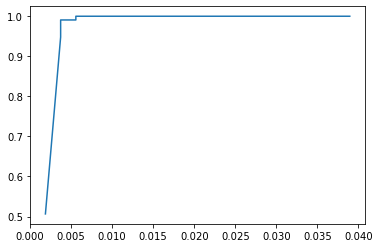

In [139]:
plt.plot(fp["Lasso"], tp["Lasso"])

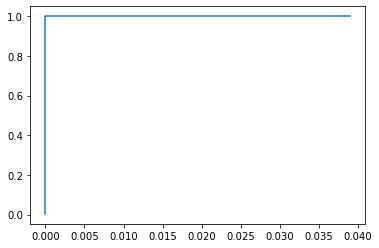

In [140]:
plt.plot(fp["XGBoost"], tp["XGBoost"])

## Données

In [75]:
good = [cycles[i] for i in range(len(cycles)) if quality[i] == 1 ]
bad = [cycles[i] for i in range(len(cycles)) if quality[i] == 0 ]

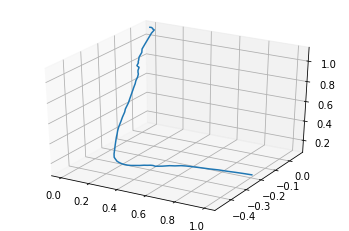

In [76]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

i = np.random.randint(100)
ax.plot(good[i][0], good[i][1], good[i][2])

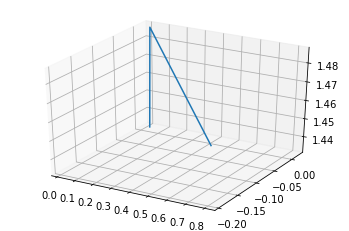

In [77]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

i = np.random.randint(30)
ax.plot(bad[i][0], bad[i][1], bad[i][2])

In [81]:
len_bad = [len(x[0]) for x in bad]
len_good = [len(x[0]) for x in good]

(array([10.,  8.,  2.,  3.,  3.,  2.,  1.,  3.,  2.,  4.]),
 array([ 3., 10., 17., 24., 31., 38., 45., 52., 59., 66., 73.]),
 <a list of 10 Patch objects>)

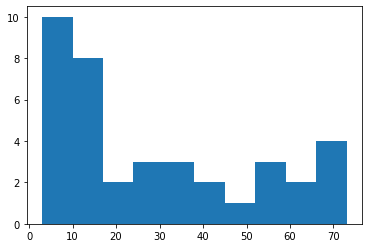

In [231]:
plt.hist(len_bad, bins=10)

(array([  1.,   0.,   1.,   0., 122., 770.]),
 array([67., 68., 69., 70., 71., 72., 73.]),
 <a list of 6 Patch objects>)

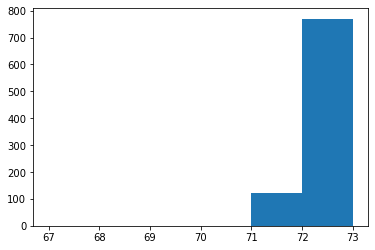

In [241]:
plt.hist(len_good, bins=6)

In [216]:
prob = regressors["Lasso"].predict(X_test)
y_pred = np.array([1 if x > 0.5 else 0 for x in prob]) 

In [217]:
misclassified = []
for i in np.argwhere(y_pred != y_test) :
    misclassified.append(indices_test[i[0]])
    print(len(cycles[indices_test[i[0]]][0]))

52
73
54
56
73


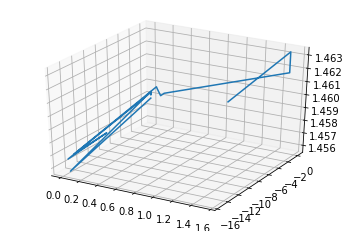

In [227]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

i = np.random.randint(len(misclassified))
ax.plot(cycles[i][0], cycles[i][1], cycles[i][2])

## Apprentissage par les tailles

In [200]:
len_traj = np.array([ [len(x[0])] for x in cycles])
print(np.concatenate((cycles_signature,len_traj), axis=1).shape)


(932, 1093)


In [201]:
X_train, X_test, y_train, y_test = train_test_split(len_traj, quality, test_size=0.6, random_state=2)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [202]:
alpha = 1.0e-5
reg = Lasso(alpha = alpha, tol=0.01, max_iter=5000, copy_X=True, fit_intercept=True, selection='random')
reg_boost = xgb.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsamble = 0.7, colsample_bytree=0.8)
regressors = {"Lasso" : reg, "XGBoost" : reg_boost}

In [203]:
for i in regressors.values():
    i.fit(X_train, y_train)
    

[15:46:09] WARNING: ../src/learner.cc:516: 
Parameters: { subsamble } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [204]:
y_pred_reg_boost = regressors['Lasso'].predict(X_test)
y_pred_reg = regressors['XGBoost'].predict(X_test)

In [205]:
t = 0.5
for i in regressors :
    prob = regressors[i].predict(X_test)
    y_pred = np.array([1 if x > t else 0 for x in prob]) 
    print(i, "")
    FP = 0
    FN = 0
    print((y_pred != y_test).sum())
    for i in np.argwhere(y_pred != y_test) :
        if y_pred[i[0]] == 1:
            FP += 1
        else:
            FN += 1
    print(f"FP : {FP}  |  FN : {FN}")
    print("_________________________")

Lasso 
5
FP : 5  |  FN : 0
_________________________
XGBoost 
2
FP : 2  |  FN : 0
_________________________


In [206]:
thresholds = np.linspace(-10, 1, 100)
fp = {}
tp = {}

for r in regressors :
    fp[r] = []
    tp[r] = []
    for t in thresholds:
        prob = regressors[r].predict(X_test)
        y_pred = np.array([1 if x > t else 0 for x in prob]) 
        FP = 0
        TP = 0
        for i in np.argwhere(y_pred != y_test):
            if y_pred[i[0]] == 1:
                FP += 1
        for i in np.argwhere(y_pred == y_test):
            if y_pred[i[0]] == 1:
                TP += 1
        fp[r].append(FP)
        tp[r].append(TP)
    fp[r] = np.array(fp[r])/np.array(y_test).sum()

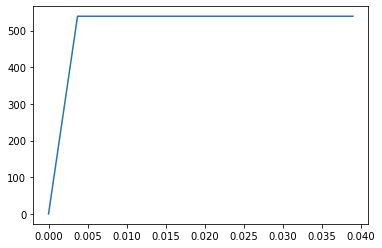

In [207]:
plt.plot(fp["XGBoost"], tp["XGBoost"])

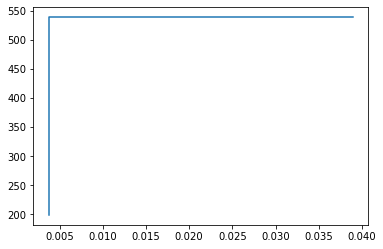

In [208]:
plt.plot(fp["Lasso"], tp["Lasso"])

73
73


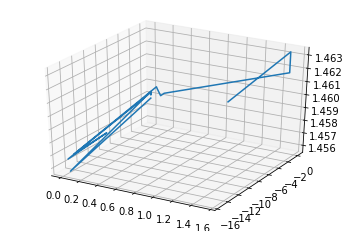

In [215]:
prob = regressors["XGBoost"].predict(X_test)
y_pred = np.array([1 if x > 0.5 else 0 for x in prob]) 

misclassified = []
for i in np.argwhere(y_pred != y_test) :
    misclassified.append(indices_test[i[0]])
    print(len(cycles[indices_test[i[0]]][0]))
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

i = np.random.randint(len(misclassified))
ax.plot(cycles[i][0], cycles[i][1], cycles[i][2])